# The Heat equation - part 1

## A few theoretical remarks
Heat propagation is described by the differential equation (for a one-dimensional system)
$$\frac{\partial T(x,t)}{\partial t} = \frac{k}{C \rho} \frac{\partial^2 T(x,t)}{\partial x^2},$$
which describes the variation of temperature ($T$) as a function of a coordinate ($x$) and time ($t$).  $k$ is the thermal conductivity, $C$ is the heat capacity and $\rho$ the density of a material.

An analytical solution can be found by separating the variables $x$ and $t$
$$T(x,t)=X(x)\cal{T} (t)$$
Substituting into the original equation, we can rewrite this as two non-coupled ordinary differential equations (ODE) as a function of the $t$ and $x$ variables.
$$\frac{d \cal{T}}{dt} (t) + \alpha^2 \frac{k}{C \rho} {\cal T}(t) = 0, \ \ \ \ \frac{d^2 X}{d x^2}(x) + \alpha^2 X(x)=0,$$
where $\alpha$ is a real number. These are ordinary differential equations, the solutions can be found for set values of $\alpha$. When multiple values of $\alpha$ are allowed, the corresponding solutions need to be added up.

For this project we consider a bar of length $L=0.3$ m with the boundary conditions $T(0,t)=T(L,t)=0$ C, e.g. with the two edges kept at a constant temperature of 0 C. We also assume the initial condition $T(x,0)=T_0=100$C for 0<x<L.

The boundary condition requires a solution for $X(x)$ of the type:
$$X(x)=\sin \alpha_n x \ \ \mbox{with} \ \ \alpha_n=n \pi/L$$
Consequently the solution for $\cal{T}(t)$ is written in the form:
$${\cal T}(t)=\exp{\left( -\frac{\alpha_n^2 kt}{C \rho} \right) } $$
Which leads to the generic solution
$$T(x,t) = \sum_{n=1}^{\infty} A_n \sin (\alpha_n x) \exp{\left( -\frac{\alpha_n^2 kt}{C \rho} \right) }, $$

To satisfy the initial condition, we can derive the factors $A_n$ of the Fourier serie and write the analytical solution as
$$T(x,t) = \sum_{n=1, 3, 5, ...}^{\infty} T_n(x,t) = \sum_{n=1, 3, 5, ...}^{\infty} \frac{4T_0}{n \pi} \sin (\alpha_n x) \exp{\left( -\frac{\alpha_n^2 kt}{C \rho} \right) }, $$


In your numerical implementation use Aluminium as a metal with heat conductivity $k=220$ W/(m K), density $\rho=2700$ kg/m$^3$ and specific heat $C=900$ J/(kg K). 

Please **note**, for simplicity we use temperatures in Celsius. Using Kelvin would require adding a constant of T=273.16K, which, being a constant, would disappear from the differential equation.



## Question: Sum the members of the series and produce a few plots
This exercise will jog your memory on how to add vectors, write a function, plot a few graphs. These are all basic python skills that you have developed in your previous courses.

The analytical solution is presented as an infinite serie of terms. 
- Write a function that calculates $T_n(x,t)$, e.g. the n-th term of the serie as a function of $x$ and $t$. You should pass an array for x, so this can be used for the calculations and plots in the questions below
- Plot two graphs, each with the first three terms of the serie (n=1,3,5) in different colours. One graph for for t=0s and one for t=20s. Choose an appropriate number of points along $x$. How does the maximum $T$ depend on $n$ for $t=20s$? Why?  
- Add the first 50 terms (up to $n=99$) of the serie and plot a graph of $T(x,t)$ for t=0, 20, 100 s. If enough points are used in the $x$ coordinate a ripple is visible in the graph for $t=0$ s. Explain this. 
- Produce a 3D plot showing $T(x,t)$ for t up to 100 s, when adding the first 50 terms. Plot as a wireframe and as a colour temperature map

In [2]:
# Define constants
SpH=900  # J/(kg K)
Rho=2700 # kg/m3
kap=220  # W/(m K)

# Define parameters of the problem
BarL=0.3 # m
T0=100.  # C

# import statements
import numpy as np
import matplotlib.pyplot as plt



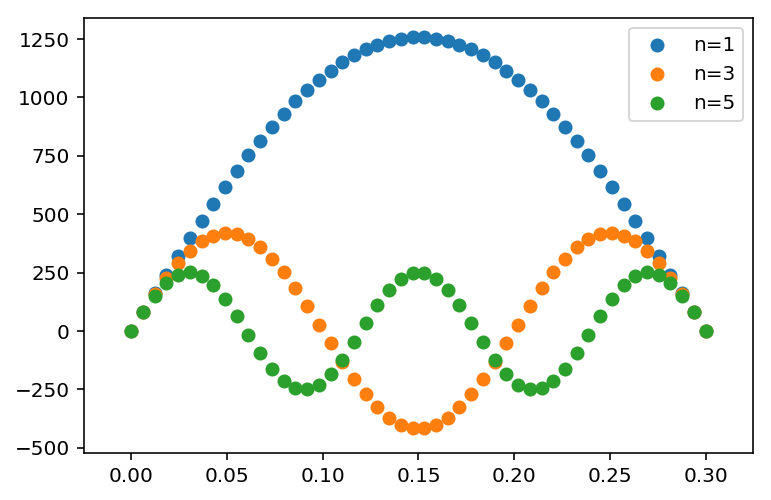

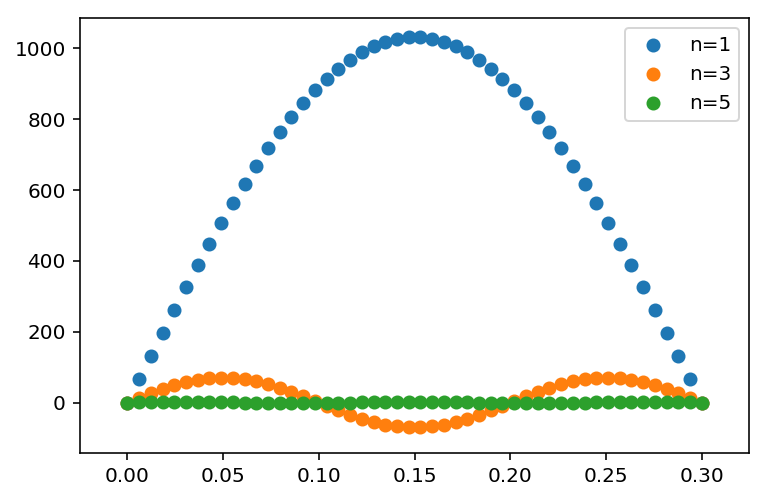

<function Tarray at 0x7feedaee4a60>
HIGH N GIVES SMALL T


In [13]:
# Complete the code below for the Nth term
# n-th term calculation. Here we pass an array in x and return an array in y. 
def TTermN(xs,t,n):
    an = (n*np.pi/BarL)
    return ((4*T0)/n*np.pi)*np.sin(an*xs)*np.exp(-((an**2)*kap*t)/(SpH*Rho))

def Tarray(xs, t):
    n = np.arange(1, 100, 2)
    an = (n*np.pi/BarL)
    T = ((4*T0)/n*np.pi)*np.sin(an*xs)*np.exp(-((an**2)*kap*t)/(SpH*Rho))
    return(Tarray)

def Tsum(xs, t):
    Tsum = np.sum(Tarray(xs, t))
    return(Tsum)


xs=np.linspace(0, BarL)

plt.scatter(xs, TTermN(xs,0,1), label = 'n=1')
plt.scatter(xs, TTermN(xs,0,3), label = 'n=3')
plt.scatter(xs, TTermN(xs,0,5), label = 'n=5')
plt.legend()
plt.show()


plt.scatter(xs, TTermN(xs,20,1), label = 'n=1')
plt.scatter(xs, TTermN(xs,20,3), label = 'n=3')
plt.scatter(xs, TTermN(xs,20,5), label = 'n=5')
plt.legend()
plt.show()

print(Tarray(4, 0))

#plt.scatter(xs, Tsum(xs, 0))
#plt.show()
#plt.scatter(xs, Tsum(xs, 20))
#plt.show()
#plt.scatter(xs, Tsum(xs, 100))
#plt.show()

print("HIGH N GIVES SMALL T")
